<a href="https://colab.research.google.com/github/ABHIJATSARARI/Data-Science-Project-with-Python/blob/main/Global_CO2_emissions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
pip install pandas matplotlib seaborn plotly ipywidgets


  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
Using cached jedi-0.19.1-py2.py3-none-any.whl (1.6 MB)


In [9]:
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display


In [10]:
url = "https://raw.githubusercontent.com/owid/co2-data/master/owid-co2-data.csv"
data = pd.read_csv(url)

# Display first few rows to inspect
data.head()


,country,year,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,...,share_global_other_co2,share_of_temperature_change_from_ghg,temperature_change_from_ch4,temperature_change_from_co2,temperature_change_from_ghg,temperature_change_from_n2o,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share
0,Afghanistan,1850,AFG,3752993.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,1851,AFG,3767956.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.157,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,Afghanistan,1852,AFG,3783940.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.156,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
3,Afghanistan,1853,AFG,3800954.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.156,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
4,Afghanistan,1854,AFG,3818038.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.155,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


In [11]:
# Select relevant columns based on the actual data structure
df = data[['year', 'country', 'co2', 'cement_co2', 'coal_co2', 'gas_co2', 'oil_co2']]

# Filter for years starting from 1990
df = df[df['year'] >= 1990]

# Drop rows with missing values
df.dropna(inplace=True)

# Display the cleaned data
df.head()


<ipython-input-11-e0ee5f43b73e>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,year,country,co2,cement_co2,coal_co2,gas_co2,oil_co2
140,1990,Afghanistan,2.024,0.046,0.278,0.403,1.271
141,1991,Afghanistan,1.914,0.046,0.250,0.389,1.204
142,1992,Afghanistan,1.482,0.046,0.022,0.363,1.030
143,1993,Afghanistan,1.487,0.047,0.018,0.352,1.048
144,1994,Afghanistan,1.454,0.047,0.015,0.338,1.032


In [12]:
fig = px.line(df, x='year', y='co2', color='country', title='Global CO2 Emissions by Country Over Time')
fig.show()


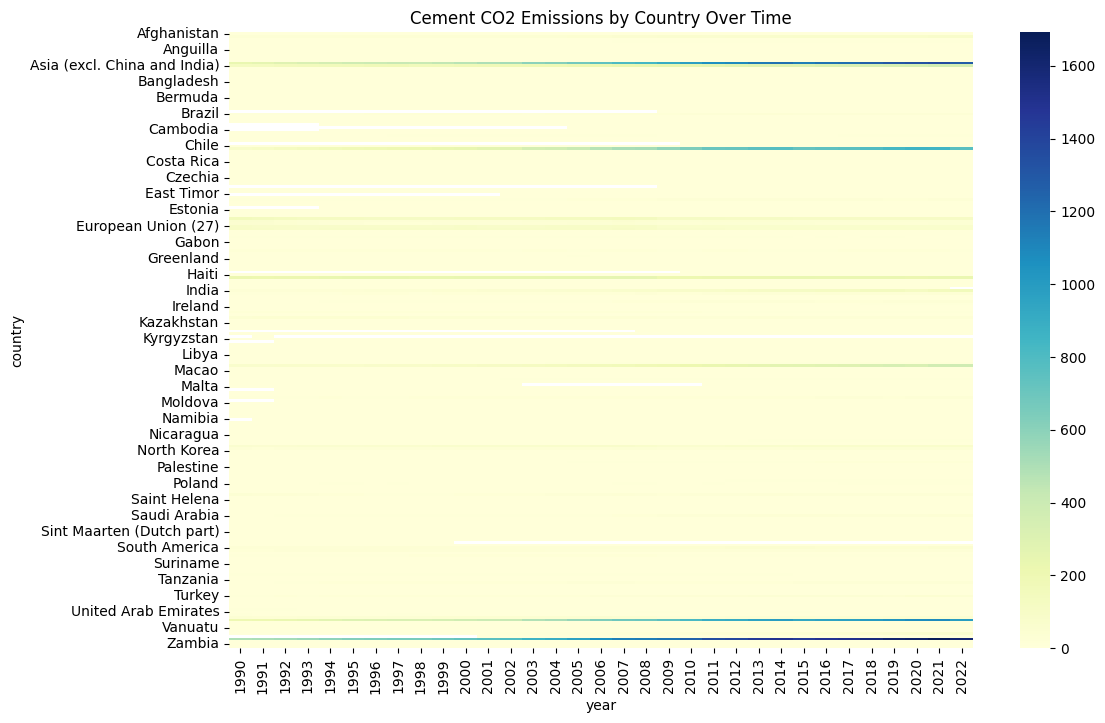

In [13]:
# Pivot the data to create a matrix for the heatmap (e.g., using cement_co2)
pivot_data = df.pivot_table(values='cement_co2', index='country', columns='year', aggfunc='sum')

# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_data, cmap='YlGnBu', annot=False)
plt.title('Cement CO2 Emissions by Country Over Time')
plt.show()


In [14]:
# Required imports
import pandas as pd
import plotly.graph_objects as go

# Load the dataset
url = "https://raw.githubusercontent.com/owid/co2-data/master/owid-co2-data.csv"
data = pd.read_csv(url)

# Select relevant columns
df = data[['year', 'country', 'co2']]

# Filter for years starting from 1990 and drop missing values
df = df[df['year'] >= 1990].dropna()

# Get unique list of countries
countries = df['country'].unique()

# Create a figure
fig = go.Figure()

# Add initial traces for each country, but make them all invisible except the first one
for country in countries:
    country_data = df[df['country'] == country]
    fig.add_trace(go.Scatter(
        x=country_data['year'],
        y=country_data['co2'],
        mode='lines',
        name=country,
        visible=(country == countries[0])  # Only the first country is visible
    ))

# Create dropdown buttons for country selection
dropdown_buttons = []
for i, country in enumerate(countries):
    button = dict(
        method='update',
        label=country,
        args=[{'visible': [j == i for j in range(len(countries))]},
              {'title': f"CO2 Emissions for {country}"}]  # Update the title
    )
    dropdown_buttons.append(button)

# Add the dropdown menu to the layout
fig.update_layout(
    updatemenus=[{
        'buttons': dropdown_buttons,
        'direction': 'down',
        'showactive': True,
        'x': 0.5,
        'xanchor': 'center',
        'y': 1.1,
        'yanchor': 'top',
    }],
    title=f"CO2 Emissions for {countries[0]}",
    xaxis_title='Year',
    yaxis_title='CO2 Emissions (million tonnes)',
)

# Display the figure
fig.show()


In [15]:
import pandas as pd
import plotly.graph_objects as go

# Load the dataset
url = "https://raw.githubusercontent.com/owid/co2-data/master/owid-co2-data.csv"
data = pd.read_csv(url)

# Select relevant columns and filter for year >= 1990
df = data[['year', 'country', 'co2']]

# Filter for the latest year with data, e.g., 2021, and drop missing values
df = df[df['year'] == 2021].dropna(subset=['co2'])

# Create the globe plot using scattergeo with country names
fig = go.Figure()

# Add scattergeo trace for plotting emissions on the globe
fig.add_trace(go.Scattergeo(
    locations = df['country'],  # Use country names directly
    locationmode = 'country names',  # Match countries based on names
    text = df['country'] + ': ' + df['co2'].astype(str) + ' million tonnes',
    marker = dict(
        size = df['co2'] / df['co2'].max() * 50,  # Scale the bubble sizes based on emissions
        color = df['co2'],
        colorscale = 'Reds',  # Color scale for emissions
        colorbar_title = "CO2 Emissions (million tonnes)",
        line_width=0,
        sizemode='area'
    )
))

# Update the layout for the globe projection
fig.update_layout(
    title='CO2 Emissions by Country (2021)',
    geo=dict(
        projection_type='orthographic',  # This creates the globe view
        showland=True,
        landcolor='rgb(230, 230, 230)',
        oceancolor='rgb(0, 255, 255)',
        showocean=True,
        countrycolor='rgb(204, 204, 204)',
        coastlinecolor='rgb(204, 204, 204)',
        projection_rotation=dict(lon=0, lat=0),  # Initial rotation
        lonaxis=dict(showgrid=True, gridwidth=0.5),
        lataxis=dict(showgrid=True, gridwidth=0.5),
    ),
    height=800,
    margin=dict(l=0, r=0, t=50, b=0)
)

# Display the figure
fig.show()
